# Audio Classification using Spectograms and CNNs
Data: https://jazzomat.hfm-weimar.de/dbformat/dbcontent.html 

Code: https://github.com/jeffprosise/Deep-Learning/blob/master/Audio%20Classification%20(CNN).ipynb
      https://github.com/nicknochnack/DeepAudioClassification 

This code is from https://github.com/jeffprosise/Deep-Learning/blob/master/Audio%20Classification%20(CNN).ipynb with small adaptations. Jeff Prosise is a technical author on Microsoft Windows applications. He is very experienced in Microsoft Windows technologies like MFC, .NET Framework, C# and others. - https://en.wikipedia.org/wiki/Jeff_Prosise 

Key differences include adjusting the model to work with 78 classes from 4 and creating spectograms from my WAV files.

In [18]:
# Imports
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

To begin the WAV files need to be made into Spectograms and given their relevant labels

I actually used this code to create the spectograms, from https://www.youtube.com/watch?v=ZLIPkmmDJAc

In [37]:
# Code from https://www.youtube.com/watch?v=ZLIPkmmDJAc
import os
import torchaudio
import matplotlib.pyplot as plt

SPECTROGRAM_DPI = 90
DEFAULT_SAMPLE_RATE = 44100
DEFAULT_HOPE_LENGTH = 1024

class Audio:
    def __init__(self, filepath, hop_length=DEFAULT_HOPE_LENGTH, sample_rate=DEFAULT_SAMPLE_RATE):
        self.hop_length = hop_length
        self.sample_rate = sample_rate
        self.waveform, self.sample_rate = torchaudio.load(filepath)

    def plot_spectrogram(self):
        waveform = self.waveform.numpy()
        _, axes = plt.subplots(1, 1)
        axes.specgram(waveform[0], Fs=self.sample_rate)
        plt.axis('off')
        plt.show(block=False)
    
    def write_disk_spectrogram(self, path, dpi=SPECTROGRAM_DPI):
        self.plot_spectrogram()
        plt.savefig(path, dpi=dpi, bbox_inches='tight')
        plt.close()

# input_folder = "/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/wav_folders_split"
# output_folder = "/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/wav_split_specto"

# for folder, _, files in os.walk(input_folder):
#     for i, file in enumerate(files):
#         file_path = os.path.join(folder, file)
#         artist = os.path.basename(folder)
#         output_path = os.path.join(output_folder, f"{artist}_{i + 1}.png")
        
#         # Create the output folder if it doesn't exist
#         os.makedirs(output_folder, exist_ok=True)
        
#         sound = Audio(file_path)
#         sound.write_disk_spectrogram(output_path)


In [ ]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

Here we go find all the specotgrams and give them a label based on which folder they are in. The label is the artist who is playing the solo.

In [22]:
# Define the base path to the spectrograms folder
base_path = '/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/spectrograms/'

# Define a list of folder names - I did this using google sheets. 
folders = ['ArtPepper', 'FreddieHubbard', 'MichaelBrecker',
'BenWebster',		'GeorgeColeman',		'MilesDavis',	
'BennyCarter',		'GerryMulligan',		'MiltJackson',	
'BennyGoodman',		'HankMobley',		'NatAdderley',	
'BixBeiderbecke',		'HarryEdison',		'OrnetteColeman',	
'BobBerg',			'HenryAllen',		'PatMartino',
'BranfordMarsalis',	'HerbieHancock',		'PatMetheny',		
'BuckClayton',		'JCHigginbotham',		'PaulDesmond',	
'CannonballAdderley',	'JJJohnson',		'PepperAdams',		
'CharlieParker',		'JoeHenderson',		'PhilWoods',	
'CharlieShavers',		'JoeLovano',		'RedGarland',	
'ChetBaker',		'JohnAbercrombie',		'RexStewart',	
'ChrisPotter',		'JohnColtrane',		'RoyEldridge',	
'ChuBerry',		'JohnnyDodds',		'SidneyBechet',	
'CliffordBrown',		'JohnnyHodges',		'SonnyRollins',	
'ColemanHawkins',		'JoshuaRedman',		'SonnyStitt',	
'CurtisFuller',		'KaiWinding',		'StanGetz',	
'DavidLiebman',		'KennyDorham',		'SteveColeman',	
'DavidMurray',		'KennyGarrett',		'SteveLacy',	
'DexterGordon',		'KennyWheeler',		'SteveTurre',	
'DickieWells',		'KidOry',			'VonFreeman',
'DizzyGillespie',		'LeeKonitz',		'WarneMarsh',	
'DonByas',			'LeeMorgan',		'WayneShorter',
'DonEllis',		'LesterYoung',		'WoodyShaw',	
'EricDolphy',		'LionelHampton',		'WyntonMarsalis',	
'FatsNavarro',		'LouisArmstrong',		'ZootSims']


# Iterate over the folders and load images from each folder 
for idx, folder_name in enumerate(folders):
    folder_path = os.path.join(base_path, folder_name)
    images, labels = load_images_from_path(folder_path, idx)
    x += images
    y += labels


KeyboardInterrupt: 

Then the data is split into test and training splits. 

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#### Building and Training the CNN. 

The audio classification is done using image classification of the spectograms. Here is the beginning of the model, using convolution layers to find the features and then pooling layers to downsize the images so that the features can be detected. It finishes with a ```softmax``` layer that gives the probability of each class. 

In [ ]:
from tensorflow.keras.models import Sequential  # Updated import for TensorFlow 2.x
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Doubled filters
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation='relu'))  # Doubled filters
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Added Dropout
model.add(Conv2D(256, (3, 3), activation='relu'))  # Doubled filters
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))  # Added Dropout
# ... (Optional: Add more convolutional layers with Dropout)

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(78, activation='softmax'))  # 78 output units and softmax activation

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/loiskelly/miniconda3/envs/aim/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 256)  │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   177,210,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 78)             │        79,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,029,902 (679.13 MB)

 Trainable params: 178,029,902 (679.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.0572 - loss: 4.8488 - val_accuracy: 0.1000 - val_loss: 3.8480
Epoch 2/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 710s 1s/step - accuracy: 0.1023 - loss: 3.7416 - val_accuracy: 0.1165 - val_loss: 3.5824
Epoch 3/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 982s 2s/step - accuracy: 0.1455 - loss: 3.3859 - val_accuracy: 0.1209 - val_loss: 3.4995
Epoch 4/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - accuracy: 0.2169 - loss: 3.0059 - val_accuracy: 0.1150 - val_loss: 3.5816
Epoch 5/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 696s 1s/step - accuracy: 0.3379 - loss: 2.4245 - val_accuracy: 0.1033 - val_loss: 3.9580
Epoch 6/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 561s 881ms/step - accuracy: 0.5296 - loss: 1.6646 - val_accuracy: 0.0934 - val_loss: 4.5188
Epoch 7/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 584s 916ms/step - accuracy: 0.7040 - loss: 1.0227 - val_accuracy: 0.0989 - val_loss: 5.4514
Epoch 8/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 622s 975ms/step - accuracy: 0.8160 - loss: 0.6236 -

#### Plotting the training and validation accuracy

Looking at the graph it doesn't look like the model has done too well! 

[]

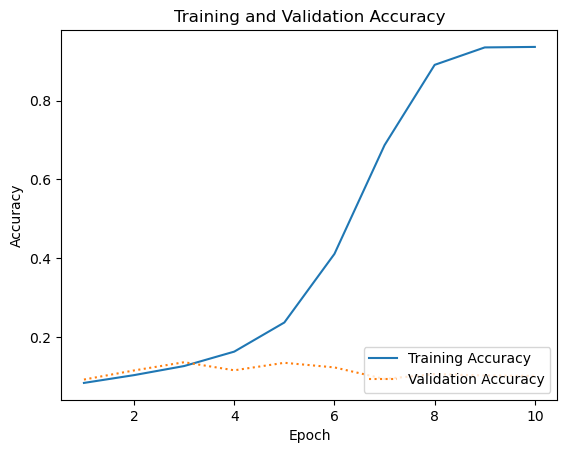

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Transfer Learning

Here we are trying to improve the model by using a pre-trained CNNs, MobileNet2. It requires less processing power. 

'MobileNewV2 if a very effectuve feature extractor.' 

https://blog.research.google/2018/04/mobilenetv2-next-generation-of-on.html

Here we run both the training and testing data through MobileNetV2 

In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

KeyboardInterrupt: 

Define a neural netowrk that classifies the features extracted by MobileNet2

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(78, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/loiskelly/miniconda3/envs/aim/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train it.

In [ ]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 92s 144ms/step - accuracy: 0.0637 - loss: 12.3963 - val_accuracy: 0.0941 - val_loss: 4.1919
Epoch 2/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 91s 143ms/step - accuracy: 0.0827 - loss: 4.1825 - val_accuracy: 0.0842 - val_loss: 4.0036
Epoch 3/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 98s 154ms/step - accuracy: 0.0771 - loss: 3.9956 - val_accuracy: 0.0850 - val_loss: 3.9530
Epoch 4/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 96s 150ms/step - accuracy: 0.0790 - loss: 3.9240 - val_accuracy: 0.0777 - val_loss: 3.9392
Epoch 5/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 92s 144ms/step - accuracy: 0.0804 - loss: 3.9032 - val_accuracy: 0.0861 - val_loss: 3.9551
Epoch 6/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 91s 142ms/step - accuracy: 0.0850 - loss: 3.8612 - val_accuracy: 0.0868 - val_loss: 3.9265
Epoch 7/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 96s 151ms/step - accuracy: 0.0850 - loss: 3.8286 - val_accuracy: 0.0810 - val_loss: 4.0056
Epoch 8/10
637/637 ━━━━━━━━━━━━━━━━━━━━ 88s 138ms/step - accuracy: 0.0923 - loss: 

Plot the accuracy. It has amde a huge improvement! 

[]

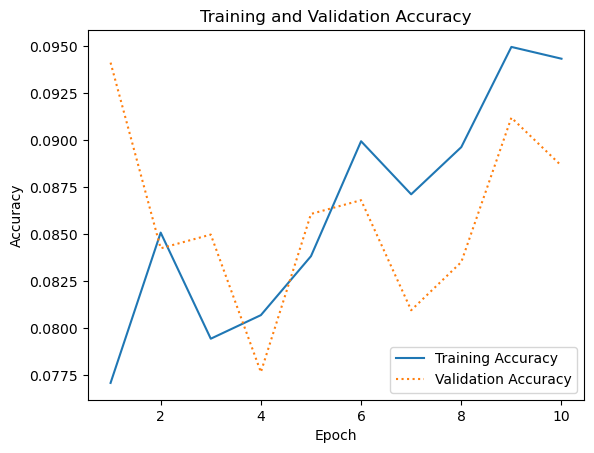

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Testing the Model

Input a solo the model has not seen before. 

/Users/loiskelly/miniconda3/envs/aim/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7947: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


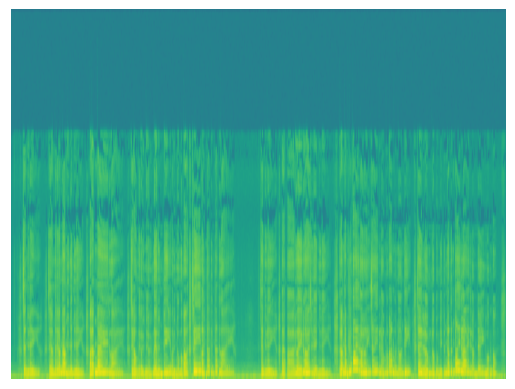

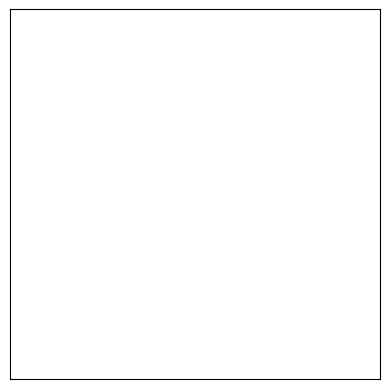

In [28]:
file_path = '/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/Jazz_solo_testing_data/vocal_solo_chet_baker.wav'
output_path = 'data/Jazz_solo_testing_data/'
sound = Audio(file_path)
sound.write_disk_spectrogram(output_path)


x = image.load_img('/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/Jazz_solo_testing_data/.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

Preprocess the specotogram and extract the features using  MobileNetV2. Then use these features to classifiy the solo. 

In [29]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)
class_labels = ['ArtPepper', 'FreddieHubbard', 'MichaelBrecker',
'BenWebster',		'GeorgeColeman',		'MilesDavis',	
'BennyCarter',		'GerryMulligan',		'MiltJackson',	
'BennyGoodman',		'HankMobley',		'NatAdderley',	
'BixBeiderbecke',		'HarryEdison',		'OrnetteColeman',	
'BobBerg',			'HenryAllen',		'PatMartino',
'BranfordMarsalis',	'HerbieHancock',		'PatMetheny',		
'BuckClayton',		'JCHigginbotham',		'PaulDesmond',	
'CannonballAdderley',	'JJJohnson',		'PepperAdams',		
'CharlieParker',		'JoeHenderson',		'PhilWoods',	
'CharlieShavers',		'JoeLovano',		'RedGarland',	
'ChetBaker',		'JohnAbercrombie',		'RexStewart',	
'ChrisPotter',		'JohnColtrane',		'RoyEldridge',	
'ChuBerry',		'JohnnyDodds',		'SidneyBechet',	
'CliffordBrown',		'JohnnyHodges',		'SonnyRollins',	
'ColemanHawkins',		'JoshuaRedman',		'SonnyStitt',	
'CurtisFuller',		'KaiWinding',		'StanGetz',	
'DavidLiebman',		'KennyDorham',		'SteveColeman',	
'DavidMurray',		'KennyGarrett',		'SteveLacy',	
'DexterGordon',		'KennyWheeler',		'SteveTurre',	
'DickieWells',		'KidOry',			'VonFreeman',
'DizzyGillespie',		'LeeKonitz',		'WarneMarsh',	
'DonByas',			'LeeMorgan',		'WayneShorter',
'DonEllis',		'LesterYoung',		'WoodyShaw',	
'EricDolphy',		'LionelHampton',		'WyntonMarsalis',	
'FatsNavarro',		'LouisArmstrong',		'ZootSims']
for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
ArtPepper: 0.010585371404886246
FreddieHubbard: 0.003732759738340974
MichaelBrecker: 0.0014846185222268105
BenWebster: 0.0034358857665210962
GeorgeColeman: 0.03616347908973694
MilesDavis: 0.05167442932724953
BennyCarter: 0.0026163673028349876
GerryMulligan: 0.001906289835460484
MiltJackson: 0.003317741211503744
BennyGoodman: 0.002181457355618477
HankMobley: 0.0030780602246522903
NatAdderley: 0.001382125192321837
BixBeiderbecke: 0.006157841067761183
HarryEdison: 0.1597757190465927
OrnetteColeman: 0.011724313721060753
BobBerg: 0.009428950026631355
HenryAllen: 0.000829884666018188
PatMartino: 0.0029952304903417826
BranfordMarsalis: 0.026902079582214355
HerbieHancock: 0.004237987566739321
PatMetheny: 0.016442758962512016
BuckClayton: 0.013827105984091759
JCHigginbotham: 0.016410544514656067
PaulDesmond: 0.011859557591378689
CannonballAdderley: 0.00012301043898332864
JJJohnson: 0.0179088544100523
PepperAdams: 0.02

Lets try splitting the testing file into smaller chunks like with the actual data set. 

In [46]:
# Code from Gemini

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import os 
import os, sys
import os
import librosa
import numpy as np
from soundfile import write


# Function to split audio and save segments
def split_and_save(audio_path, output_folder, duration=5):
    # Load audio file
    audio_data, sr = librosa.load(audio_path, sr=None)

    # Calculate total number of segments
    total_segments = int(np.ceil(len(audio_data) / (duration * sr)))

    # Split audio into segments and save each segment
    for i in range(total_segments):
        # Calculate start and end sample indices for the segment
        start_sample = i * duration * sr
        end_sample = min((i + 1) * duration * sr, len(audio_data))

        # Extract segment
        segment = audio_data[start_sample:end_sample]

        # Generate filename for the segment
        filename = os.path.join(output_folder, f"{os.path.basename(audio_path)}_{i + 1}.wav")
        write(filename, segment, sr)


# Define input and output folders
input_folder = "/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/Jazz_solo_testing_data"
output_folder = "/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/Jazz_solo_testing_data_split"

# Iterate through all WAV files in the input folder
for root, dirs, files in os.walk(input_folder):
    for file in files:
        if file.endswith(".wav"): 
            audio_path = os.path.join(root, file)
            split_and_save(audio_path, output_folder, duration=5)



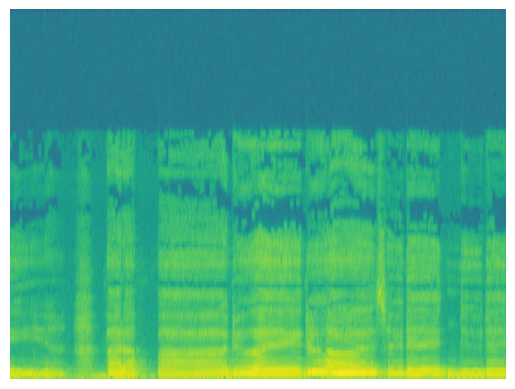

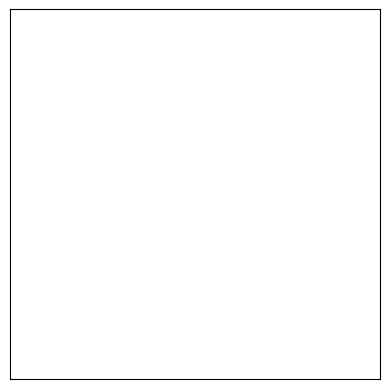

In [47]:
file_path = '/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/Jazz_solo_testing_data_split/vocal_solo_chet_baker.wav_6.wav'
output_path = 'data/Jazz_solo_testing_data/test1'
sound = Audio(file_path)
sound.write_disk_spectrogram(output_path)


x = image.load_img('/Users/loiskelly/Documents/GitHub/ai4mediaproject/data/Jazz_solo_testing_data/test1.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [48]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)
class_labels = ['ArtPepper', 'FreddieHubbard', 'MichaelBrecker',
'BenWebster',		'GeorgeColeman',		'MilesDavis',	
'BennyCarter',		'GerryMulligan',		'MiltJackson',	
'BennyGoodman',		'HankMobley',		'NatAdderley',	
'BixBeiderbecke',		'HarryEdison',		'OrnetteColeman',	
'BobBerg',			'HenryAllen',		'PatMartino',
'BranfordMarsalis',	'HerbieHancock',		'PatMetheny',		
'BuckClayton',		'JCHigginbotham',		'PaulDesmond',	
'CannonballAdderley',	'JJJohnson',		'PepperAdams',		
'CharlieParker',		'JoeHenderson',		'PhilWoods',	
'CharlieShavers',		'JoeLovano',		'RedGarland',	
'ChetBaker',		'JohnAbercrombie',		'RexStewart',	
'ChrisPotter',		'JohnColtrane',		'RoyEldridge',	
'ChuBerry',		'JohnnyDodds',		'SidneyBechet',	
'CliffordBrown',		'JohnnyHodges',		'SonnyRollins',	
'ColemanHawkins',		'JoshuaRedman',		'SonnyStitt',	
'CurtisFuller',		'KaiWinding',		'StanGetz',	
'DavidLiebman',		'KennyDorham',		'SteveColeman',	
'DavidMurray',		'KennyGarrett',		'SteveLacy',	
'DexterGordon',		'KennyWheeler',		'SteveTurre',	
'DickieWells',		'KidOry',			'VonFreeman',
'DizzyGillespie',		'LeeKonitz',		'WarneMarsh',	
'DonByas',			'LeeMorgan',		'WayneShorter',
'DonEllis',		'LesterYoung',		'WoodyShaw',	
'EricDolphy',		'LionelHampton',		'WyntonMarsalis',	
'FatsNavarro',		'LouisArmstrong',		'ZootSims']
for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
ArtPepper: 0.010585371404886246
FreddieHubbard: 0.003732759738340974
MichaelBrecker: 0.0014846185222268105
BenWebster: 0.0034358857665210962
GeorgeColeman: 0.03616347908973694
MilesDavis: 0.05167442932724953
BennyCarter: 0.0026163673028349876
GerryMulligan: 0.001906289835460484
MiltJackson: 0.003317741211503744
BennyGoodman: 0.002181457355618477
HankMobley: 0.0030780602246522903
NatAdderley: 0.001382125192321837
BixBeiderbecke: 0.006157841067761183
HarryEdison: 0.1597757190465927
OrnetteColeman: 0.011724313721060753
BobBerg: 0.009428950026631355
HenryAllen: 0.000829884666018188
PatMartino: 0.0029952304903417826
BranfordMarsalis: 0.026902079582214355
HerbieHancock: 0.004237987566739321
PatMetheny: 0.016442758962512016
BuckClayton: 0.013827105984091759
JCHigginbotham: 0.016410544514656067
PaulDesmond: 0.011859557591378689
CannonballAdderley: 0.00012301043898332864
JJJohnson: 0.0179088544100523
PepperAdams: 0.0206